### **RISCO DE FOGO: QUEIMADAS NO CERRADO**
<hr>
<p align="justify">
Este trabalho é referente as tarefas desenvolvidas no Bloco 1. Espera-se desenvolver um projeto capaz de utilizar os comandos aprendidos pela linguagem de programação Python, na disciplina de Aprendizado de Máquina, além de desenvolver um sistema de previsão através de Machine Learning. O grupo desenvolvedor é composto pelas discentes:
<p align="justify">
Isabela Bento Beneti </p>
<p align="justify">
Monyque Karoline de Paula Silva </p>
<p align="justify">
Sofia Baccega C.C. de Oliveira </p>
<p align="justify">
Sophia Figueiredo Michek </p>
<hr>

### **Início:**
<p align="justify">
Em um primento momento, iremos demonstrar o processo de tratamento dos dados obtidos via Database do INPE a respeito dos focos de incêndio ocorridos no Cerrado durante o período Janeiro-Julho(2022). É necessário realizar as padronizações de bibliotecas inicias, como a Pandas, Seaborn e Matplotlib, posteriormente, trabalha-se os dados até a otimização destes para a análise dos atríbutos escolhidos.
</p>

### **Coleta:**



In [140]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [141]:
#Dados do Cerrado Brasileiro, armazenados mensalmente via .csv
jan = pd.read_csv('janeiro.csv', sep=',')
fev = pd.read_csv('fev.csv', sep=',')
marco = pd.read_csv('marco.csv', sep=',')
abril = pd.read_csv('abril.csv', sep=',')
maio = pd.read_csv('maio.csv', sep=',')
junho = pd.read_csv('junho.csv', sep=',')
julho = pd.read_csv('julho.csv', sep=',')

#Dados trabalhados para a eliminação de NaN nas colunas e identificação dos tipos de dados
jan.convert_dtypes(), jan.dropna(how = 'any', inplace = True), 
fev.convert_dtypes(), fev.dropna(how = 'any', inplace = True),
marco.convert_dtypes(), marco.dropna(how = 'any', inplace = True),
abril.convert_dtypes(), abril.dropna(how = 'any', inplace = True),
maio.convert_dtypes(), maio.dropna(how = 'any', inplace = True),
junho.convert_dtypes(), junho.dropna(how = 'any', inplace = True),
julho.convert_dtypes(), julho.dropna(how = 'any', inplace = True), 

(        Unnamed: 0        lat        lon        data_hora_gmt satelite  \
 0             4599     -10.09     -44.36  2022-07-01 01:04:28   MSG-03   
 1             4600     -10.06     -44.36  2022-07-01 01:04:28   MSG-03   
 2             4601     -10.09     -44.41  2022-07-01 01:04:28   MSG-03   
 3             4606 -22.795401 -49.362499  2022-07-01 01:17:22  METOP-B   
 4             4607 -22.797701 -49.371899  2022-07-01 01:17:22  METOP-B   
 ...            ...        ...        ...                  ...      ...   
 130845     3778045     -12.62     -44.42  2022-07-31 23:54:07  GOES-16   
 130846     3778052     -11.36     -47.36  2022-07-31 23:54:15  GOES-16   
 130847     3778053     -10.65     -48.81  2022-07-31 23:54:19  GOES-16   
 130848     3778054     -10.48     -47.98  2022-07-31 23:54:21  GOES-16   
 130849     3778055     -10.46     -47.98  2022-07-31 23:54:21  GOES-16   
 
                      municipio     estado    pais  municipio_id  estado_id  \
 0                 

<p align="justify">
Eliminado as linhas dos dados não atribuidos(NaN), as desenvolvedoras optaram pelo uso do comando drop, do Pandas, de modo a selecionar as colunas não desejadas do arquvivo .csv, otimizando o processo de análise de dados.
</p>

In [142]:
## Para rodar o código pela primeira vez, descomente essas linhas

jan.drop(columns=['Unnamed: 0', 'estado', 'data_hora_gmt', 'satelite', 'municipio', 'pais', 'municipio_id', 'estado_id', 'pais_id', 'bioma'], axis = 1, inplace=True)
fev.drop(columns=['Unnamed: 0', 'estado', 'data_hora_gmt', 'satelite', 'municipio', 'pais', 'municipio_id', 'estado_id', 'pais_id', 'bioma'], axis = 1, inplace=True)
marco.drop(columns=['Unnamed: 0', 'estado', 'data_hora_gmt', 'satelite', 'municipio', 'pais', 'municipio_id', 'estado_id', 'pais_id', 'bioma'], axis = 1, inplace=True)
abril.drop(columns=['Unnamed: 0', 'estado', 'data_hora_gmt', 'satelite', 'municipio', 'pais', 'municipio_id', 'estado_id', 'pais_id', 'bioma'], axis = 1, inplace=True)
maio.drop(columns=['Unnamed: 0', 'estado', 'data_hora_gmt', 'satelite', 'municipio', 'pais', 'municipio_id', 'estado_id', 'pais_id', 'bioma'], axis = 1, inplace=True)
junho.drop(columns=['Unnamed: 0', 'estado', 'data_hora_gmt', 'satelite', 'municipio', 'pais', 'municipio_id', 'estado_id', 'pais_id', 'bioma'], axis = 1, inplace=True)
julho.drop(columns=['Unnamed: 0', 'estado', 'data_hora_gmt', 'satelite', 'municipio', 'pais', 'municipio_id', 'estado_id', 'pais_id', 'bioma'], axis = 1, inplace=True)

<p align="justify">
Realizada o processo de seleção de colunas, o próximo passo consiste na identificação dos tipos de dados utilizados em cada coluna e especificamente, em nosso caso, na identificação se dé fato só está sendo utilizado as variáveis numéricas.     
</p>

In [143]:
jan.dtypes, jan.shape

(lat                      float64
 lon                      float64
 numero_dias_sem_chuva    float64
 precipitacao             float64
 risco_fogo               float64
 dtype: object,
 (10700, 5))

In [144]:
fev.dtypes, fev.shape

(lat                      float64
 lon                      float64
 numero_dias_sem_chuva    float64
 precipitacao             float64
 risco_fogo               float64
 dtype: object,
 (2513, 5))

In [145]:
marco.dtypes, marco.shape

(lat                      float64
 lon                      float64
 numero_dias_sem_chuva    float64
 precipitacao             float64
 risco_fogo               float64
 dtype: object,
 (10700, 5))

In [146]:
abril.dtypes, abril.shape

(lat                      float64
 lon                      float64
 numero_dias_sem_chuva    float64
 precipitacao             float64
 risco_fogo               float64
 dtype: object,
 (8265, 5))

In [147]:
maio.dtypes, maio.shape

(lat                      float64
 lon                      float64
 numero_dias_sem_chuva    float64
 precipitacao             float64
 risco_fogo               float64
 dtype: object,
 (57480, 5))

In [148]:
junho.dtypes, junho.shape

(lat                      float64
 lon                      float64
 numero_dias_sem_chuva    float64
 precipitacao             float64
 risco_fogo               float64
 dtype: object,
 (63805, 5))

In [149]:
julho.dtypes, julho.shape

(lat                      float64
 lon                      float64
 numero_dias_sem_chuva    float64
 precipitacao             float64
 risco_fogo               float64
 dtype: object,
 (119910, 5))

<p align="justify"> Realizada o procedimento de identificação dos tipos de dados existentes no código, inicia-se o processo de normalização de dados. Ela é ocorrente por meio do comando "zscore". Esse processo de normalização é extremamente importante para análises estátisticas, principalmente ao considerar que esse processo é remetente a transformação em escala da distribuição de uma variável para poder fazer comparações entre conjunto de elementos, evitando o efeito de influências. 
</p>

In [216]:
# Normalização dos dados de Janeiro
jan_d = stats.zscore(jan) # normalização por zscore
jan_d


,lat,lon,numero_dias_sem_chuva,precipitacao,risco_fogo,Idade_zscore
775,0.880581,1.103235,1.020874,0.454035,0.122380,1.020874
776,0.206903,-1.113470,-0.997650,1.487638,0.113696,-0.997650
777,0.206330,-1.115736,-0.997650,1.399044,0.113696,-0.997650
778,-1.180089,0.319497,0.796594,-0.343316,0.116301,0.796594
779,-1.180446,0.316817,0.796594,-0.343316,0.116301,0.796594
...,...,...,...,...,...,...
12808,0.590182,0.540179,-0.100528,-0.343316,0.118907,-0.100528
12809,-0.336896,0.394854,2.590838,-0.343316,0.122380,2.590838
12810,0.590182,0.540179,-0.100528,-0.343316,0.118907,-0.100528
12811,-0.336896,0.394854,2.590838,-0.343316,0.122380,2.590838


In [151]:
# Normalização dos dados de Fevereiro
fev_d = stats.zscore(fev)
fev_d

,lat,lon,numero_dias_sem_chuva,precipitacao,risco_fogo
0,-4.99344,-43.77810,3.0,0.0,0.1
1,-4.99233,-43.78469,3.0,0.0,0.0
2,-5.88530,-45.43486,2.0,4.1,0.0
3,-4.99289,-43.78138,3.0,0.0,0.0
4,-4.98816,-43.77710,3.0,0.0,0.1
...,...,...,...,...,...
2536,-20.89000,-55.77000,4.0,0.0,1.0
2537,-20.89000,-55.77000,4.0,0.0,1.0
2538,-20.89000,-55.77000,4.0,0.0,1.0
2539,-20.89000,-55.77000,4.0,0.0,1.0


In [152]:
# Normalização dos dados de Março
marco_d = stats.zscore(marco)
marco_d

,lat,lon,numero_dias_sem_chuva,precipitacao,risco_fogo
775,0.880581,1.103235,1.020874,0.454035,0.122380
776,0.206903,-1.113470,-0.997650,1.487638,0.113696
777,0.206330,-1.115736,-0.997650,1.399044,0.113696
778,-1.180089,0.319497,0.796594,-0.343316,0.116301
779,-1.180446,0.316817,0.796594,-0.343316,0.116301
...,...,...,...,...,...
12808,0.590182,0.540179,-0.100528,-0.343316,0.118907
12809,-0.336896,0.394854,2.590838,-0.343316,0.122380
12810,0.590182,0.540179,-0.100528,-0.343316,0.118907
12811,-0.336896,0.394854,2.590838,-0.343316,0.122380


In [153]:
# Normalização dos dados de Abril
abril_d = stats.zscore(abril)
abril_d

,lat,lon,numero_dias_sem_chuva,precipitacao,risco_fogo
0,0.231712,0.630058,-0.557091,-0.258990,0.096215
1,0.231712,0.625166,-0.557091,-0.258990,0.097263
2,0.231712,0.625166,-0.557091,-0.258990,0.097263
3,0.231712,0.630058,-0.557091,-0.258990,0.096215
4,0.231712,0.625166,-0.557091,-0.258990,0.097263
...,...,...,...,...,...
8260,-0.342114,-1.898398,-0.937322,-0.297692,0.092022
8261,-0.341946,-1.897962,-0.937322,-0.297692,0.092022
8262,-0.333346,-1.906002,-0.683834,-0.297692,0.092022
8263,-0.332134,-1.906844,-0.683834,-0.297692,0.092022


In [154]:
# Normalização dos dados de Maio
maio_d = stats.zscore(maio)
maio_d

,lat,lon,numero_dias_sem_chuva,precipitacao,risco_fogo
0,-1.493818,-0.272225,0.411363,-0.136269,0.084364
1,-0.425465,0.228246,0.198068,0.009436,0.078169
2,-0.292464,0.744551,-0.228521,-0.136269,0.081886
3,1.014565,0.133371,-0.797308,-0.136269,0.073212
4,-0.185816,-1.385005,-0.228521,-0.136269,0.074451
...,...,...,...,...,...
57816,-1.227830,-0.556883,-0.015227,-0.136269,0.079408
57817,-1.918406,-1.005001,-0.086325,-0.136269,0.084364
57818,0.536191,0.066121,0.198068,-0.136269,0.078169
57819,0.669960,-0.084760,0.198068,-0.136269,0.083125


In [155]:
# Normalização dos dados de Junho
junho_d = stats.zscore(junho)
fev_d

,lat,lon,numero_dias_sem_chuva,precipitacao,risco_fogo
0,1.102918,0.790922,0.072398,-0.438413,0.082027
1,1.103108,0.789484,0.072398,-0.438413,0.080806
2,0.950138,0.429219,0.047352,0.293338,0.080806
3,1.103012,0.790206,0.072398,-0.438413,0.080806
4,1.103823,0.791141,0.072398,-0.438413,0.082027
...,...,...,...,...,...
2536,-1.620251,-1.827148,0.097445,-0.438413,0.093016
2537,-1.620251,-1.827148,0.097445,-0.438413,0.093016
2538,-1.620251,-1.827148,0.097445,-0.438413,0.093016
2539,-1.620251,-1.827148,0.097445,-0.438413,0.093016


In [156]:
# Normalização dos dados de Julho
julho_d = stats.zscore(julho)
julho_d

,lat,lon,numero_dias_sem_chuva,precipitacao,risco_fogo
0,0.160446,0.919564,-0.164559,-0.10267,0.096311
1,0.167048,0.919564,-0.176775,-0.10267,0.096311
2,0.160446,0.904308,-0.103482,-0.10267,0.096311
3,-2.635617,-0.606830,-0.250068,-0.10267,0.096101
4,-2.636123,-0.609698,-0.250068,-0.10267,0.095680
...,...,...,...,...,...
124662,0.981303,0.519848,0.177475,-0.10267,0.096311
124663,0.981303,0.513746,0.177475,-0.10267,0.096311
124664,0.972500,0.986692,0.030889,-0.10267,0.096311
124665,0.983503,0.519848,0.177475,-0.10267,0.096311


## Análise de Dados

<p align="justify"> De modo a analisar os dados obtidos, identifica-se informações estatísticas sobre cada amostra mensal de dados. Inicialmente, realiza-se o plot da descrição estátisca dos dados, como obter, por exemplo: a média e a moda. Em seguida, realiza-se o plot dos gráficos por meio de uma matriz de covariância e correlação entre os atríbutos para analisar as relações entre os atributos.
    </p>

### JANEIRO

In [157]:
#Descrição dos dados de Janeiro
jan_d.describe()

,lat,lon,numero_dias_sem_chuva,precipitacao,risco_fogo
count,1.070000e+04,1.070000e+04,1.070000e+04,1.070000e+04,1.070000e+04
mean,-2.178112e-16,6.853085e-16,1.274993e-16,2.656235e-18,-1.328117e-18
std,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00
min,-2.294596e+00,-2.866015e+00,-9.976499e-01,-3.433164e-01,-8.561836e+00
25%,-8.705623e-01,-4.523054e-01,-7.733694e-01,-3.433164e-01,1.145645e-01
50%,2.691993e-01,3.986440e-01,-3.248084e-01,-3.433164e-01,1.163014e-01
75%,7.203894e-01,8.244025e-01,3.480330e-01,-1.956588e-01,1.189066e-01
max,3.248950e+00,1.437863e+00,7.525009e+00,1.338884e+01,1.223803e-01


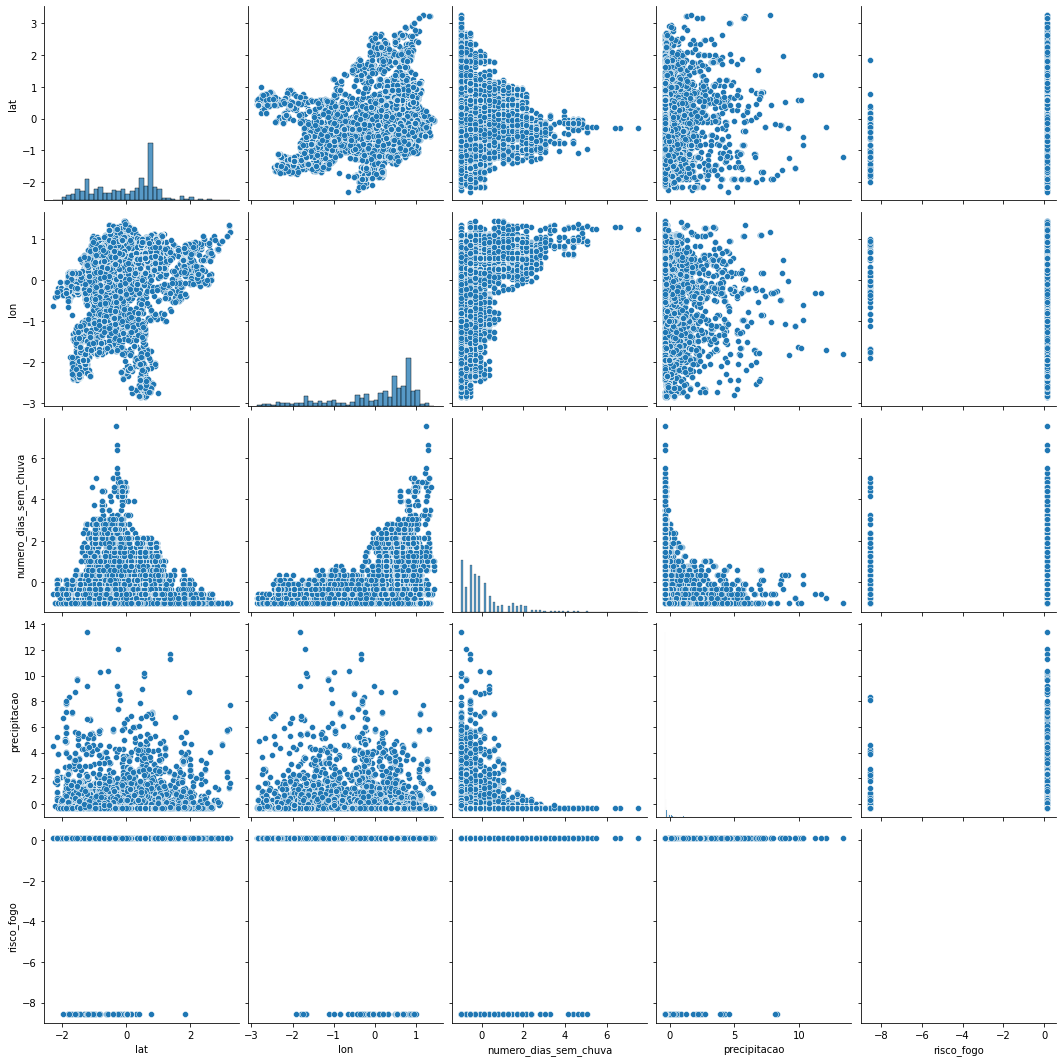

In [158]:
# Matriz de gráficos scatter 
sns.pairplot(jan_d, height=3);

# mostra o gráfico usando a função show() da matplotlib
plt.show()

In [159]:
# Matriz de covâriancia
jan_covariancia = jan_d.cov()

# Matriz de correlação
jan_correlacao = jan_d.corr()

print('Matriz de covariância: ')
display(jan_covariancia)

print('\n\nMatriz de correlação: ')
display(jan_correlacao)

Matriz de covariância: 


,lat,lon,numero_dias_sem_chuva,precipitacao,risco_fogo
lat,1.000093,0.463705,-0.008274,-0.030223,0.076441
lon,0.463705,1.000093,0.394455,-0.195863,-0.015163
numero_dias_sem_chuva,-0.008274,0.394455,1.000093,-0.176186,-0.034664
precipitacao,-0.030223,-0.195863,-0.176186,1.000093,-0.018541
risco_fogo,0.076441,-0.015163,-0.034664,-0.018541,1.000093




Matriz de correlação: 


,lat,lon,numero_dias_sem_chuva,precipitacao,risco_fogo
lat,1.000000,0.463661,-0.008274,-0.030220,0.076434
lon,0.463661,1.000000,0.394418,-0.195844,-0.015162
numero_dias_sem_chuva,-0.008274,0.394418,1.000000,-0.176170,-0.034661
precipitacao,-0.030220,-0.195844,-0.176170,1.000000,-0.018539
risco_fogo,0.076434,-0.015162,-0.034661,-0.018539,1.000000


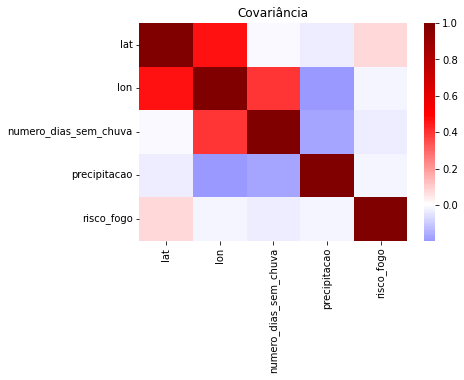

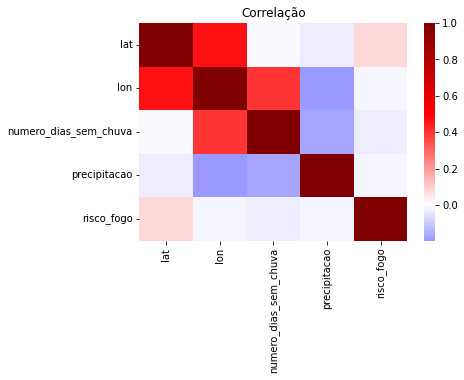

In [192]:
#Criando um mapa de cores dos valoes da covariancia
sns.heatmap(df_covariance, 
        xticklabels=df_correlation.columns,
        yticklabels=df_correlation.columns,
           cmap='seismic',
           center = 0)

plt.title('Covariância')
plt.show()

#Criando um mapa de cores dos valoes da correlação
sns.heatmap(df_correlation, 
        xticklabels=df_correlation.columns,
        yticklabels=df_correlation.columns,
           cmap='seismic',
           center = 0)

plt.title('Correlação')
plt.show()

### FEVEREIRO

In [161]:
#Descrição dos dados de Fevereiro
fev_d.describe()

,lat,lon,numero_dias_sem_chuva,precipitacao,risco_fogo
count,2.513000e+03,2.513000e+03,2.513000e+03,2.513000e+03,2.513000e+03
mean,2.261974e-16,-4.976344e-16,5.654936e-18,2.261974e-17,-8.482404e-18
std,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00
min,-2.161500e+00,-2.720107e+00,-2.502412e+01,-4.384127e-01,-1.211703e+01
25%,-5.578568e-01,-4.009426e-01,-2.740854e-03,-4.384127e-01,8.080591e-02
50%,6.933745e-02,4.649053e-01,4.735199e-02,-3.848700e-01,8.202691e-02
75%,9.407673e-01,7.136874e-01,7.239841e-02,-8.146111e-02,8.202691e-02
max,1.489827e+00,1.244585e+00,1.475377e-01,9.252824e+00,9.301595e-02


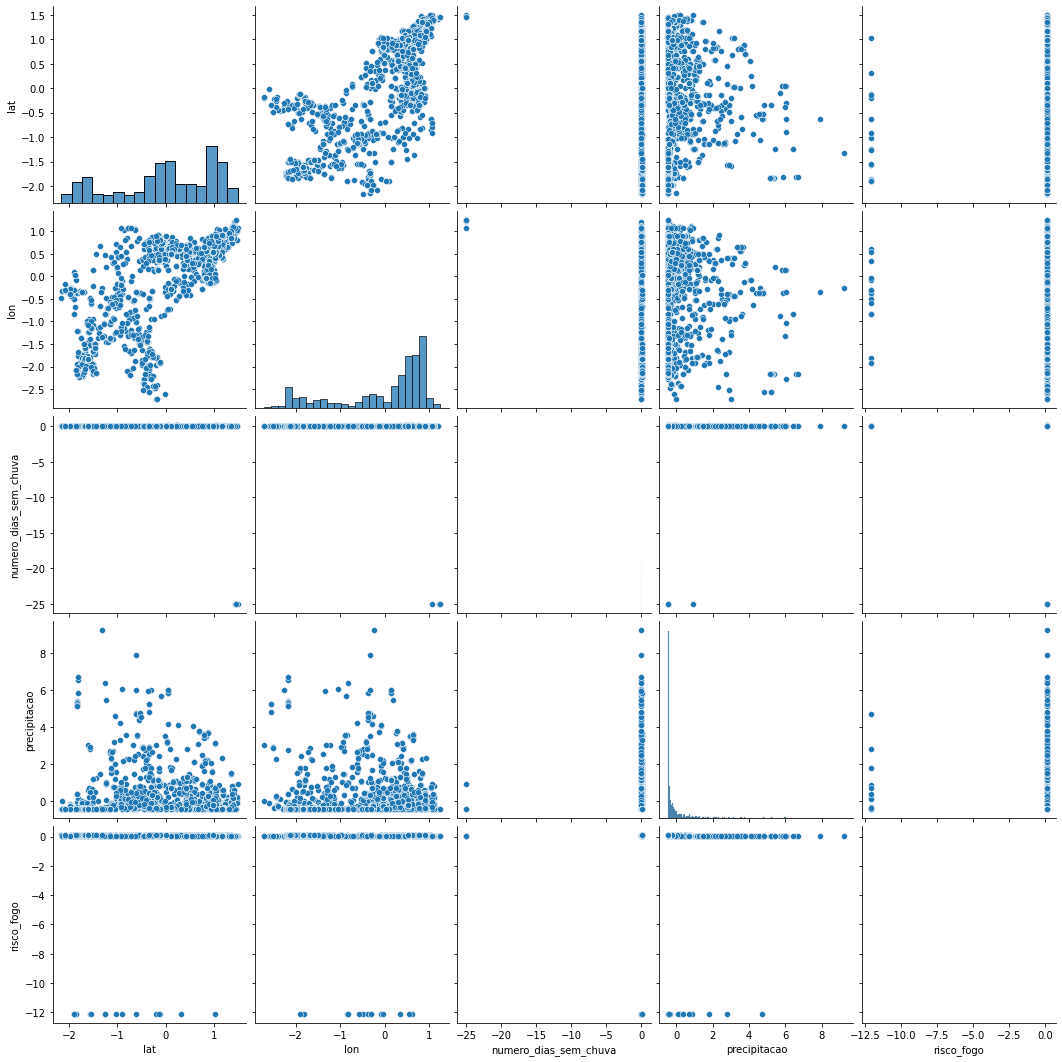

In [162]:
# Matriz de gráficos scatter 
sns.pairplot(fev_d, height=3);

# mostra o gráfico usando a função show() da matplotlib
plt.show()

In [164]:
# Matriz de covâriancia
fev_covariancia = fev_d.cov()

# Matriz de correlação
fev_correlacao = fev_d.corr()

print('Matriz de covariância: ')
display(fev_covariancia)

print('\n\nMatriz de correlação: ')
display(fev_correlacao)

Matriz de covariância: 


,lat,lon,numero_dias_sem_chuva,precipitacao,risco_fogo
lat,1.000398,0.741008,-0.055721,-0.073305,0.076926
lon,0.741008,1.000398,-0.040522,-0.161298,0.036109
numero_dias_sem_chuva,-0.055721,-0.040522,1.000398,-0.004849,-0.000891
precipitacao,-0.073305,-0.161298,-0.004849,1.000398,-0.038384
risco_fogo,0.076926,0.036109,-0.000891,-0.038384,1.000398




Matriz de correlação: 


,lat,lon,numero_dias_sem_chuva,precipitacao,risco_fogo
lat,1.000000,0.740713,-0.055699,-0.073276,0.076895
lon,0.740713,1.000000,-0.040506,-0.161234,0.036095
numero_dias_sem_chuva,-0.055699,-0.040506,1.000000,-0.004847,-0.000891
precipitacao,-0.073276,-0.161234,-0.004847,1.000000,-0.038368
risco_fogo,0.076895,0.036095,-0.000891,-0.038368,1.000000


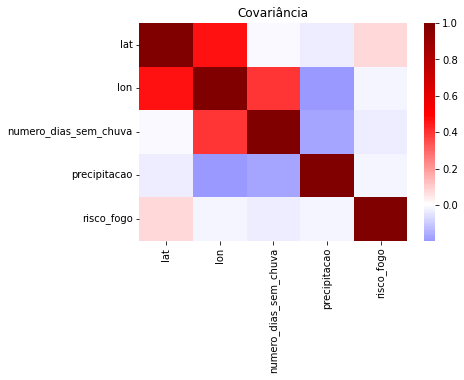

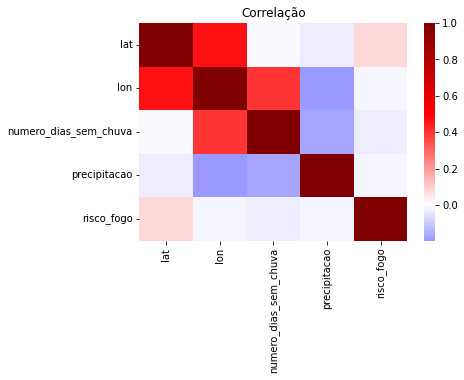

In [194]:
#Criando um mapa de cores dos valoes da covariancia
sns.heatmap(df_covariance, 
        xticklabels=df_correlation.columns,
        yticklabels=df_correlation.columns,
        cmap='seismic',
        center = 0)

plt.title('Covariância')
plt.show()

#Criando um mapa de cores dos valoes da correlação
sns.heatmap(df_correlation, 
        xticklabels=df_correlation.columns,
        yticklabels=df_correlation.columns, 
        cmap='seismic',
        center = 0)

plt.title('Correlação')
plt.show()

### MARÇO

In [ ]:
#Descrição dos dados de Março
marco_d.describe()

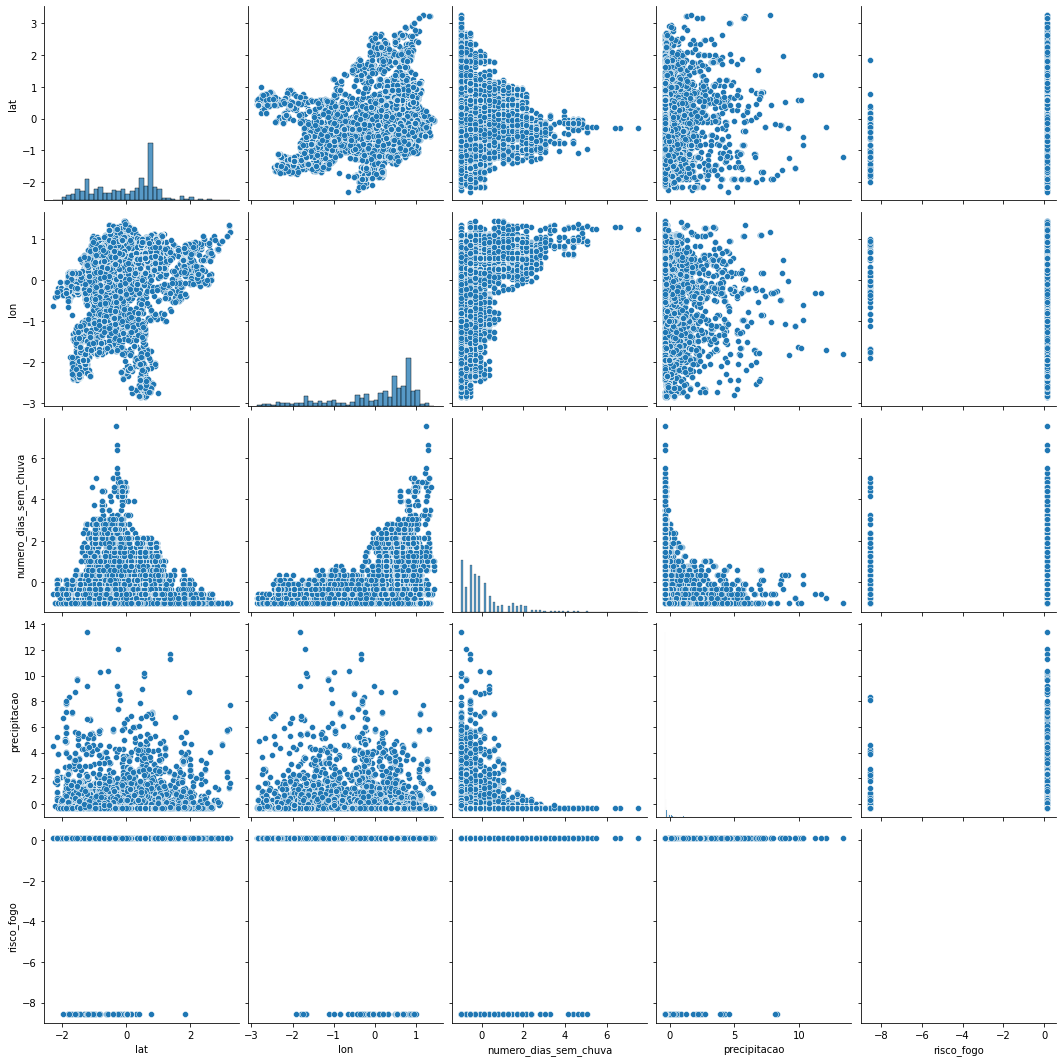

In [176]:
# Matriz de gráficos scatter 
sns.pairplot(marco_d, height=3);

# mostra o gráfico usando a função show() da matplotlib
plt.show()

In [166]:
# Matriz de covâriancia
marco_covariancia = marco.cov()

# Matriz de correlação
marco_correlacao = marco.corr()

print('Matriz de covariância: ')
display(marco_covariancia)

print('\n\nMatriz de correlação: ')
display(marco_correlacao)

Matriz de covariância: 


,lat,lon,numero_dias_sem_chuva,precipitacao,risco_fogo
lat,14.747148,7.229151,-0.141671,-0.392992,33.800930
lon,7.229151,16.484095,7.140331,-2.692638,-7.088830
numero_dias_sem_chuva,-0.141671,7.140331,19.881888,-2.660076,-17.797277
precipitacao,-0.392992,-2.692638,-2.660076,11.467500,-7.229564
risco_fogo,33.800930,-7.088830,-17.797277,-7.229564,13261.091888




Matriz de correlação: 


,lat,lon,numero_dias_sem_chuva,precipitacao,risco_fogo
lat,1.000000,0.463661,-0.008274,-0.030220,0.076434
lon,0.463661,1.000000,0.394418,-0.195844,-0.015162
numero_dias_sem_chuva,-0.008274,0.394418,1.000000,-0.176170,-0.034661
precipitacao,-0.030220,-0.195844,-0.176170,1.000000,-0.018539
risco_fogo,0.076434,-0.015162,-0.034661,-0.018539,1.000000


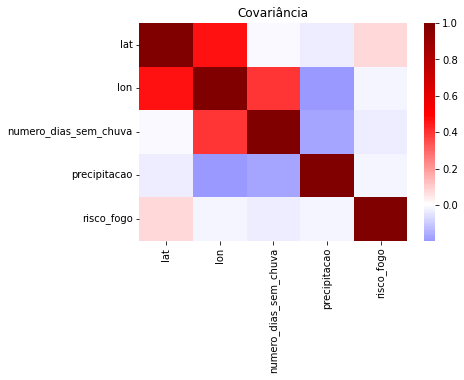

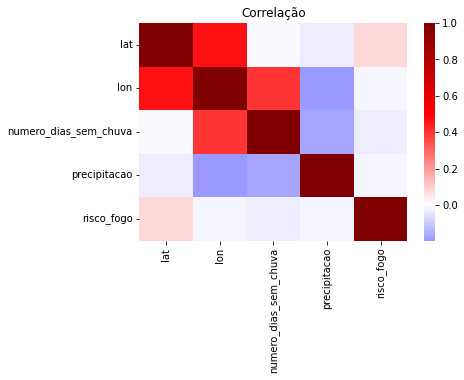

In [195]:
#Criando um mapa de cores dos valoes da covariancia
sns.heatmap(df_covariance, 
        xticklabels=df_correlation.columns,
        yticklabels=df_correlation.columns,
        cmap='seismic',
        center = 0)

plt.title('Covariância')
plt.show()

#Criando um mapa de cores dos valoes da correlação
sns.heatmap(df_correlation, 
        xticklabels=df_correlation.columns,
        yticklabels=df_correlation.columns,
        cmap='seismic',
        center = 0)

plt.title('Correlação')
plt.show()

### ABRIL

In [ ]:
#Descrição dos dados de Abril
abril.describe()

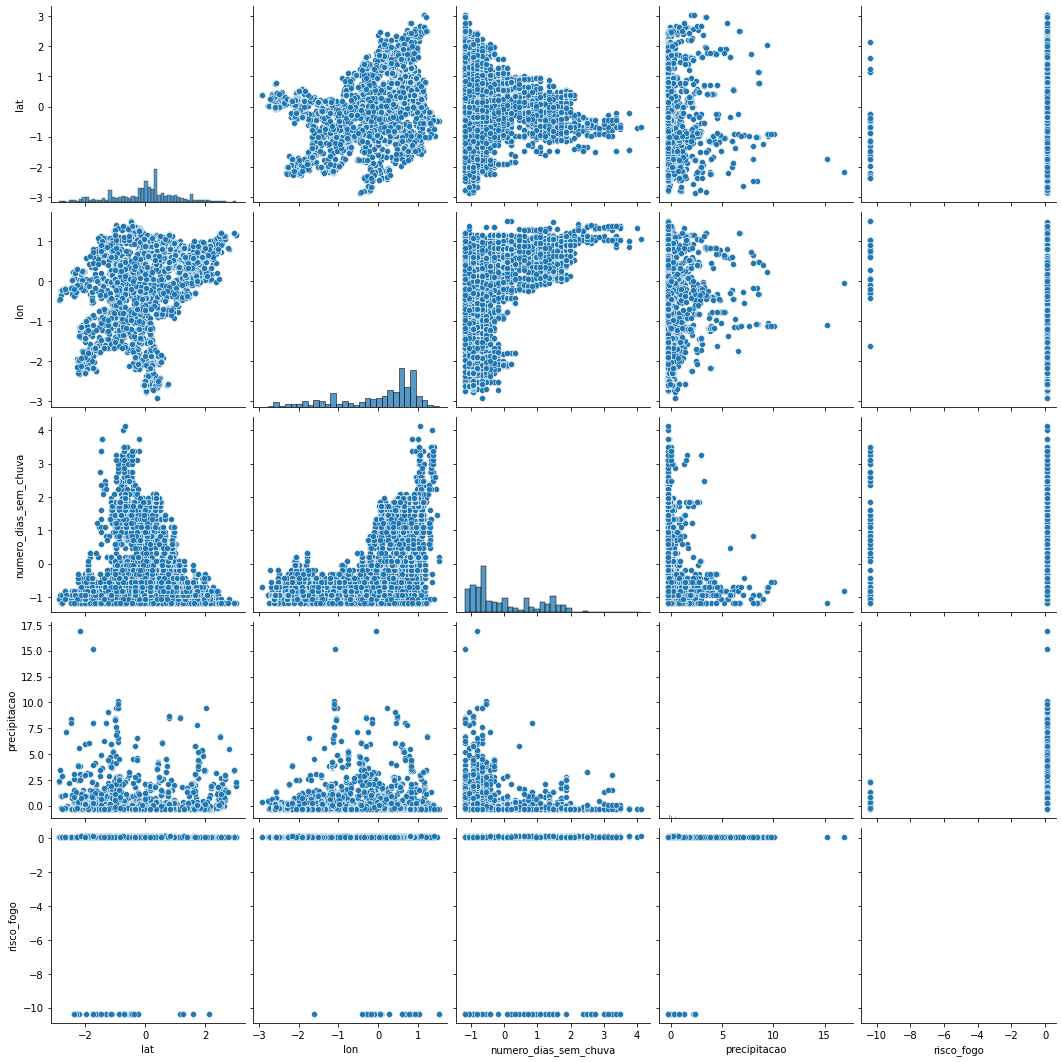

In [177]:
# Matriz de gráficos scatter 
sns.pairplot(abril_d, height=3);

# mostra o gráfico usando a função show() da matplotlib
plt.show()

In [168]:
# Matriz de covâriancia
abril_covariancia = abril_d.cov()

# Matriz de correlação
abril_correlacao = abril_d.corr()

print('Matriz de covariância: ')
display(abril_covariancia)

print('\n\nMatriz de correlação: ')
display(abril_correlacao)

Matriz de covariância: 


,lat,lon,numero_dias_sem_chuva,precipitacao,risco_fogo
lat,1.000121,0.442732,0.002612,-0.156752,0.079887
lon,0.442732,1.000121,0.536420,-0.177360,-0.026072
numero_dias_sem_chuva,0.002612,0.536420,1.000121,-0.178664,-0.042439
precipitacao,-0.156752,-0.177360,-0.178664,1.000121,-0.002435
risco_fogo,0.079887,-0.026072,-0.042439,-0.002435,1.000121




Matriz de correlação: 


,lat,lon,numero_dias_sem_chuva,precipitacao,risco_fogo
lat,1.000000,0.442678,0.002612,-0.156733,0.079878
lon,0.442678,1.000000,0.536356,-0.177339,-0.026069
numero_dias_sem_chuva,0.002612,0.536356,1.000000,-0.178642,-0.042434
precipitacao,-0.156733,-0.177339,-0.178642,1.000000,-0.002434
risco_fogo,0.079878,-0.026069,-0.042434,-0.002434,1.000000


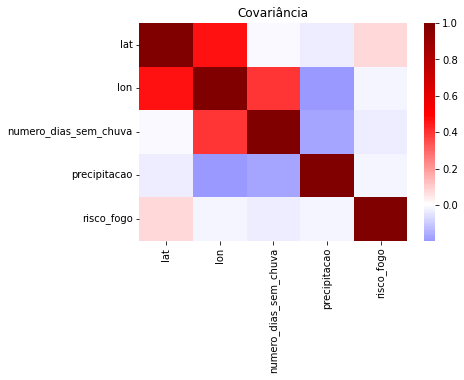

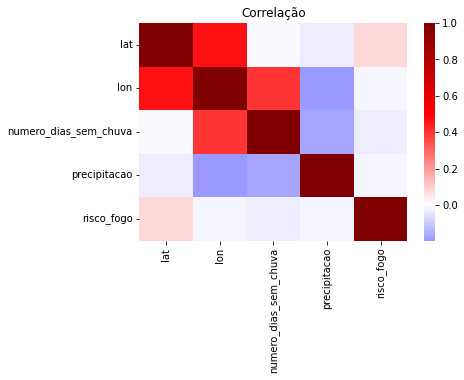

In [197]:
#Criando um mapa de cores dos valoes da covariancia
sns.heatmap(df_covariance, 
        xticklabels=df_correlation.columns,
        yticklabels=df_correlation.columns,
        cmap='seismic',
        center = 0)

plt.title('Covariância')
plt.show()

#Criando um mapa de cores dos valoes da correlação
sns.heatmap(df_correlation, 
        xticklabels=df_correlation.columns,
        yticklabels=df_correlation.columns,
        cmap='seismic',
        center = 0)

plt.title('Correlação')
plt.show()

### MAIO

In [ ]:
#Descrição dos dados de Maio
maio_d.describe()

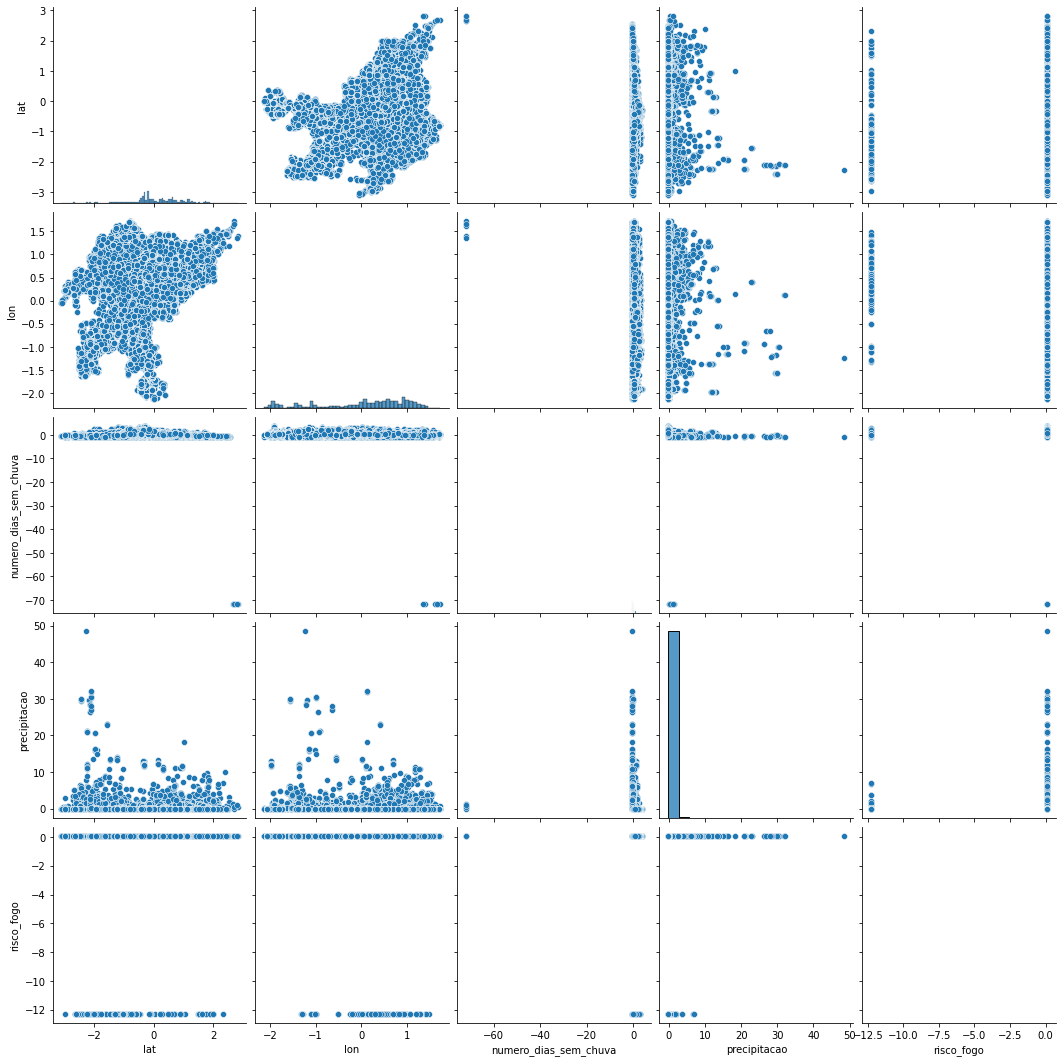

In [178]:
# Matriz de gráficos scatter 
sns.pairplot(maio_d, height=3);

# mostra o gráfico usando a função show() da matplotlib
plt.show()

In [170]:
# Matriz de covâriancia
maio_covariancia = maio_d.cov()

# Matriz de correlação
maio_correlacao = maio_d.corr()

print('Matriz de covariância: ')
display(maio_covariancia)

print('\n\nMatriz de correlação: ')
display(maio_correlacao)

Matriz de covariância: 


,lat,lon,numero_dias_sem_chuva,precipitacao,risco_fogo
lat,1.000017,0.393315,-0.140782,-0.068655,0.070399
lon,0.393315,1.000017,-0.234695,-0.024247,-0.036689
numero_dias_sem_chuva,-0.140782,-0.234695,1.000017,-0.025301,0.007037
precipitacao,-0.068655,-0.024247,-0.025301,1.000017,-0.000640
risco_fogo,0.070399,-0.036689,0.007037,-0.000640,1.000017




Matriz de correlação: 


,lat,lon,numero_dias_sem_chuva,precipitacao,risco_fogo
lat,1.000000,0.393308,-0.140779,-0.068653,0.070398
lon,0.393308,1.000000,-0.234691,-0.024246,-0.036688
numero_dias_sem_chuva,-0.140779,-0.234691,1.000000,-0.025300,0.007037
precipitacao,-0.068653,-0.024246,-0.025300,1.000000,-0.000640
risco_fogo,0.070398,-0.036688,0.007037,-0.000640,1.000000


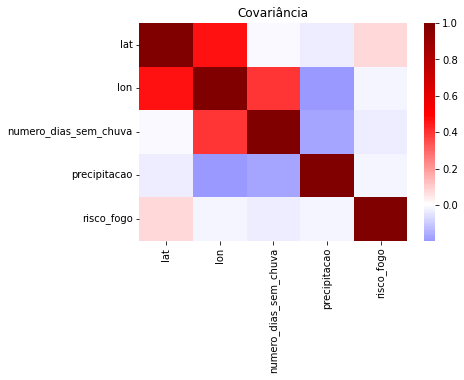

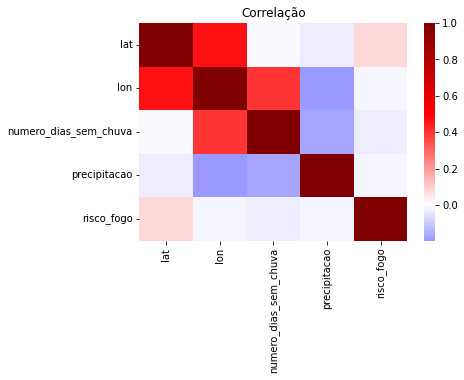

In [198]:
#Criando um mapa de cores dos valoes da covariancia
sns.heatmap(df_covariance, 
        xticklabels=df_correlation.columns,
        yticklabels=df_correlation.columns,
        cmap='seismic',
        center = 0)

plt.title('Covariância')
plt.show()

#Criando um mapa de cores dos valoes da correlação
sns.heatmap(df_correlation, 
        xticklabels=df_correlation.columns,
        yticklabels=df_correlation.columns,
        cmap='seismic',
        center = 0)

plt.title('Correlação')
plt.show()

### JUNHO

In [ ]:
#Descrição dos dados de Janeiro
junho_d.describe()

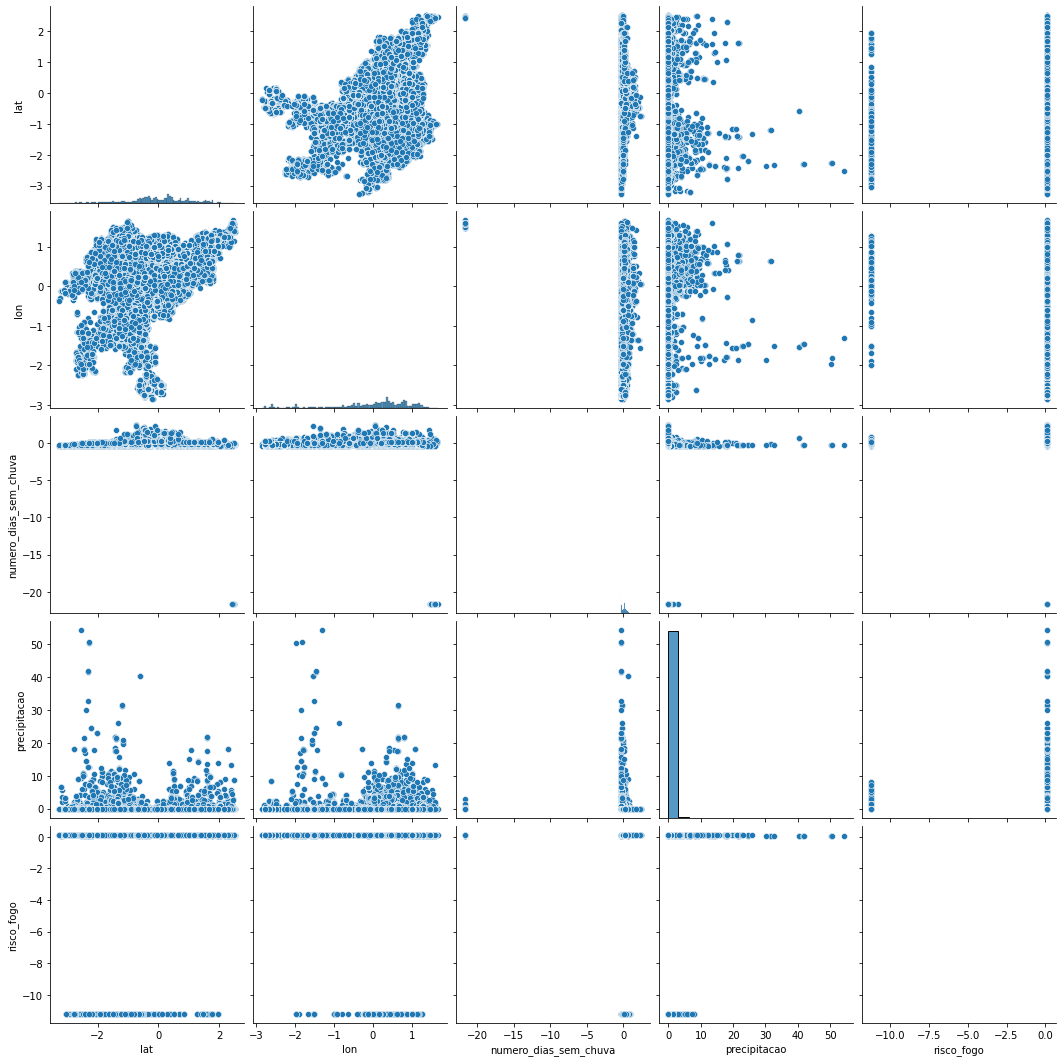

In [179]:
# Matriz de gráficos scatter 
sns.pairplot(junho_d, height=3);

# mostra o gráfico usando a função show() da matplotlib
plt.show()

In [172]:
# Matriz de covâriancia
junho_covariancia = junho_d.cov()

# Matriz de correlação
junho_correlacao = junho_d.corr()

print('Matriz de covariância: ')
display(junho_covariancia)

print('\n\nMatriz de correlação: ')
display(junho_correlacao)

Matriz de covariância: 


,lat,lon,numero_dias_sem_chuva,precipitacao,risco_fogo
lat,1.000016,0.383622,-0.113334,-0.066238,0.080475
lon,0.383622,1.000016,-0.062264,0.007655,-0.020022
numero_dias_sem_chuva,-0.113334,-0.062264,1.000016,-0.022085,0.008545
precipitacao,-0.066238,0.007655,-0.022085,1.000016,-0.011532
risco_fogo,0.080475,-0.020022,0.008545,-0.011532,1.000016




Matriz de correlação: 


,lat,lon,numero_dias_sem_chuva,precipitacao,risco_fogo
lat,1.000000,0.383616,-0.113332,-0.066237,0.080474
lon,0.383616,1.000000,-0.062263,0.007655,-0.020022
numero_dias_sem_chuva,-0.113332,-0.062263,1.000000,-0.022085,0.008544
precipitacao,-0.066237,0.007655,-0.022085,1.000000,-0.011532
risco_fogo,0.080474,-0.020022,0.008544,-0.011532,1.000000


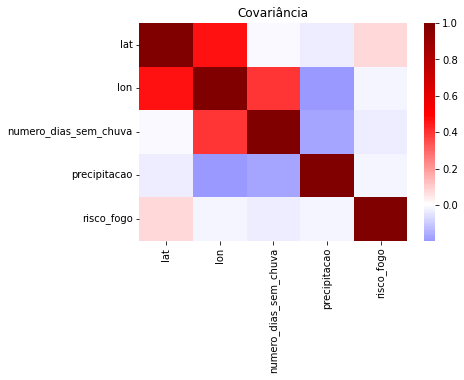

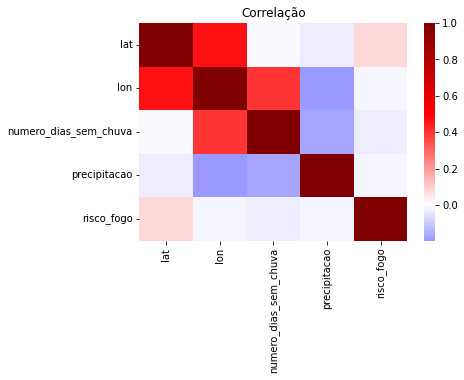

In [199]:
#Criando um mapa de cores dos valoes da covariancia
sns.heatmap(df_covariance, 
        xticklabels=df_correlation.columns,
        yticklabels=df_correlation.columns,
        cmap='seismic',
        center = 0)

plt.title('Covariância')
plt.show()

#Criando um mapa de cores dos valoes da correlação
sns.heatmap(df_correlation, 
        xticklabels=df_correlation.columns,
        yticklabels=df_correlation.columns,
        cmap='seismic',
        center = 0)

plt.title('Correlação')
plt.show()

### JULHO

In [ ]:
#Descrição dos dados de Julho
julho_d.describe()

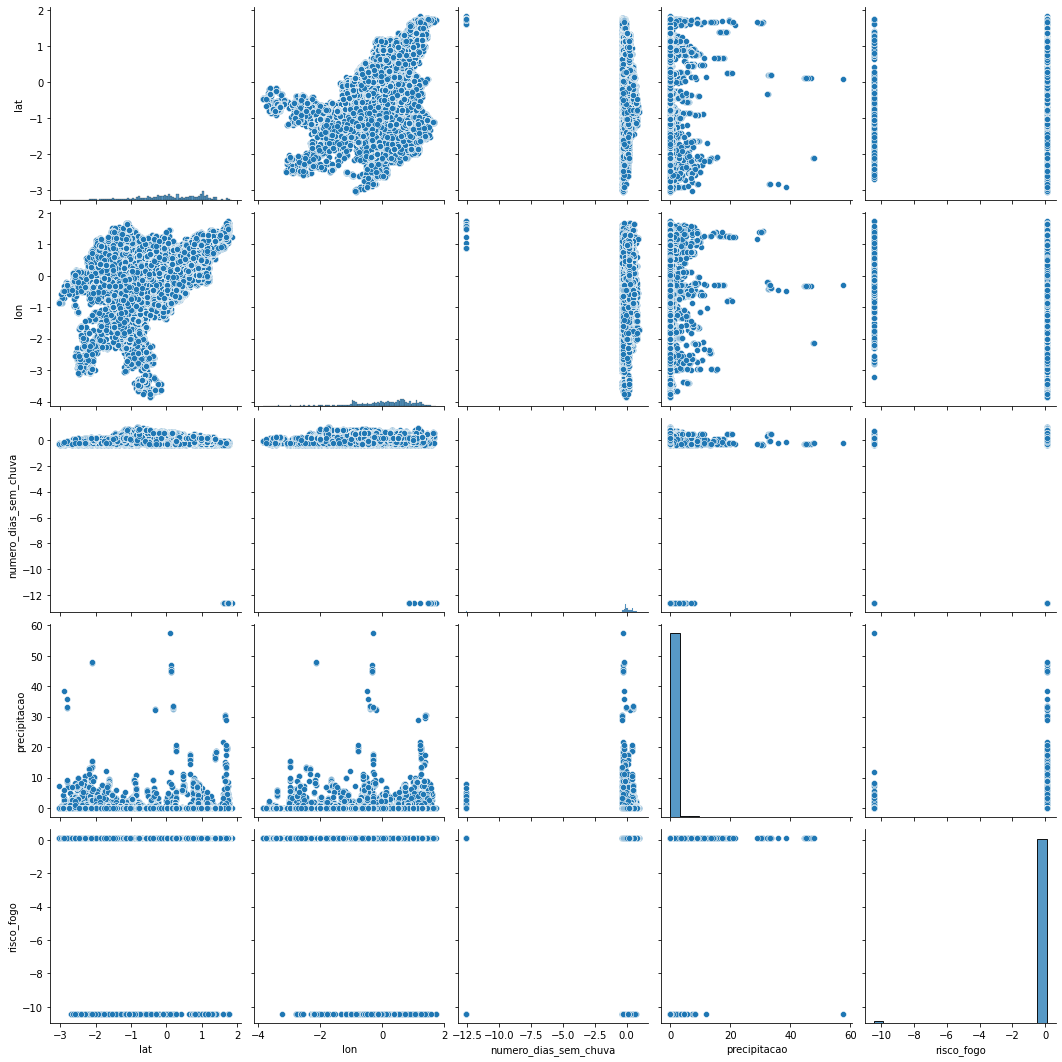

In [180]:
# Matriz de gráficos scatter 
sns.pairplot(julho_d, height=3);

# mostra o gráfico usando a função show() da matplotlib
plt.show()

In [174]:
# Matriz de covâriancia
julho_covariancia = julho_d.cov()

# Matriz de correlação
julho_correlacao = julho_d.corr()

print('Matriz de covariância: ')
display(julho_covariancia)

print('\n\nMatriz de correlação: ')
display(julho_correlacao)

Matriz de covariância: 


,lat,lon,numero_dias_sem_chuva,precipitacao,risco_fogo
lat,1.000008,0.533663,-0.164847,-0.038018,0.110522
lon,0.533663,1.000008,-0.154633,-0.054480,0.018456
numero_dias_sem_chuva,-0.164847,-0.154633,1.000008,-0.026073,0.010206
precipitacao,-0.038018,-0.054480,-0.026073,1.000008,-0.005049
risco_fogo,0.110522,0.018456,0.010206,-0.005049,1.000008




Matriz de correlação: 


,lat,lon,numero_dias_sem_chuva,precipitacao,risco_fogo
lat,1.000000,0.533658,-0.164846,-0.038018,0.110521
lon,0.533658,1.000000,-0.154632,-0.054480,0.018456
numero_dias_sem_chuva,-0.164846,-0.154632,1.000000,-0.026073,0.010206
precipitacao,-0.038018,-0.054480,-0.026073,1.000000,-0.005049
risco_fogo,0.110521,0.018456,0.010206,-0.005049,1.000000


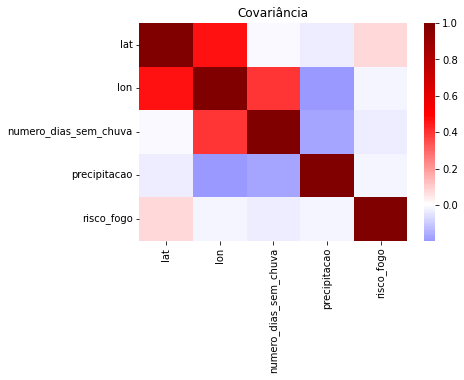

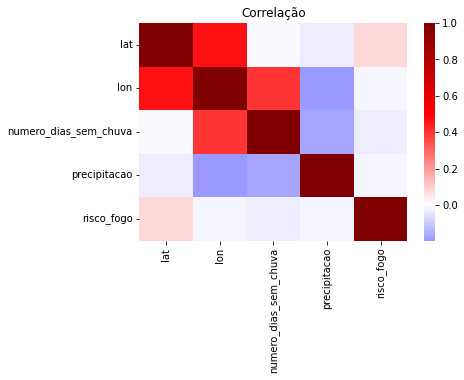

In [201]:
#Criando um mapa de cores dos valoes da covariancia
sns.heatmap(df_covariance, 
        xticklabels=df_correlation.columns,
        yticklabels=df_correlation.columns,
        cmap='seismic',
        center = 0)


plt.title('Covariância')
plt.show()

#Criando um mapa de cores dos valoes da correlação
sns.heatmap(df_correlation, 
        xticklabels=df_correlation.columns,
        yticklabels=df_correlation.columns,
        cmap='seismic',
        center = 0)

plt.title('Correlação')
plt.show()

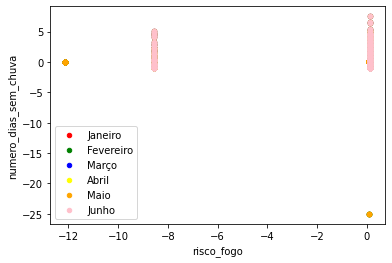

In [210]:
ax1 = jan_d.plot(kind='scatter', x="risco_fogo", y="numero_dias_sem_chuva", color='Red', label="Janeiro")
ax2 = fev_d.plot(kind='scatter', x="risco_fogo", y="numero_dias_sem_chuva", color='Green', label="Fevereiro", ax=ax1)
ax3 = marco_d.plot(kind='scatter', x="risco_fogo", y="numero_dias_sem_chuva", color='Blue', label="Março", ax=ax2)
ax4 = jan_d.plot(kind='scatter', x="risco_fogo", y="numero_dias_sem_chuva", color='Yellow', label="Abril", ax=ax3)
ax5 = fev_d.plot(kind='scatter', x="risco_fogo", y="numero_dias_sem_chuva", color='Orange', label="Maio", ax=ax4)
ax6 = marco_d.plot(kind='scatter', x="risco_fogo", y="numero_dias_sem_chuva", color='Pink', label="Junho", ax=ax5)
plt.show()